`ApJdataFrames` Douglas_2017
---
`Title`: Poking the Beehive from Space: K2 Rotation Periods for Praesepe    
`Authors`: S. T. Douglas, M. A. Agüeros, K. R. Covey, and A. Kraus

Data is from this paper:  
http://iopscience.iop.org/article/10.3847/1538-4357/aa6e52/meta

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = 150

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import astropy

In [4]:
from astropy.table import Table

In [5]:
from astropy.io import ascii

## Table 1.  Praesepe Members with Discrepant $P_{\mathrm{rot}}$ Measurements

In [6]:
tab1 = ascii.read('http://iopscience.iop.org/0004-637X/842/2/83/suppdata/apjaa6e52t1_mrt.txt')

In [7]:
tab1.show_in_notebook()

idx,NAME,EPIC,PTF-Prot,SWASP-Prot,Scholz-Prot,Kovacs-Prot,Prot-K2
,,,d,d,d,d,d
0,--,211885995,9.2,--,--,18.13,9.16
1,AD 1508,212009427,1.55,--,--,11.22,1.56
2,AD 1512,--,9.64,--,--,19.15,--
3,AD 2182,211734093,--,--,--,15.87,18.22
4,AD 2509,211970613,--,--,0.5,--,1.01
5,AD 2527,211939989,--,--,0.47,--,0.92
6,AD 2552,211989299,25.36,--,--,--,12.84
7,AD 2802,211980450,--,--,0.51,--,1.02
8,AD 3128,--,--,3.52,--,14.17,--


In [8]:
! mkdir ../data/Douglas2017

mkdir: ../data/Douglas2017: File exists


In [9]:
tab1.write('../data/Douglas2017/tab1.csv', format='ascii.csv')

In [10]:
! head ../data/Douglas2017/tab1.csv

NAME,EPIC,PTF-Prot,SWASP-Prot,Scholz-Prot,Kovacs-Prot,Prot-K2
,211885995,9.2,,,18.13,9.16
AD 1508,212009427,1.55,,,11.22,1.56
AD 1512,,9.64,,,19.15,
AD 2182,211734093,,,,15.87,18.22
AD 2509,211970613,,,0.5,,1.01
AD 2527,211939989,,,0.47,,0.92
AD 2552,211989299,25.36,,,,12.84
AD 2802,211980450,,,0.51,,1.02
AD 3128,,,3.52,,14.17,


## Table 2.  Companions to Praesepe Members with Measured $P_{\mathrm{rot}}$

In [11]:
tab2 = ascii.read('http://iopscience.iop.org/0004-637X/842/2/83/suppdata/apjaa6e52t2_mrt.txt')

The last column is a string of references, which can be pretty long.  Let's ignore it for better display.

In [12]:
tab2[tab2.colnames[:-1]].show_in_notebook(display_length=10)

idx,NAME,EPIC,2MASS,RAh,RAm,RAs,DEd,DEm,DEs,Epoch,Binary,Triple
,,,,h,min,s,deg,arcmin,arcsec,,,
0,AD 0432,--,J08220219+1959592,8,22,2.18,19,59,59.23,2000,photometric,--
1,AD 0487,--,J08223394+1903521,8,22,33.93,19,3,51.96,2000,photometric,--
2,AD 0868,211995609,J08263521+2010567,8,26,35.2,20,10,56.69,2000,photometric,--
3,AD 1180,--,J08285400+2034416,8,28,53.99,20,34,41.53,2000,photometric,--
4,AD 1268,212025207,J08294438+2040232,8,29,44.38,20,40,23.18,2000,photometric,--
5,AD 1296,211889082,J08295706+1834001,8,29,57.06,18,34,0.08,2000,photometric,--
6,AD 1508,212009427,J08312987+2024375,8,31,29.87,20,24,37.49,2000,photometric,--
7,HSHJ 15,211971354,J08314045+1947542,8,31,40.45,19,47,54.19,2000,photometric,--
8,JS 14,211898294,J08324972+1842063,8,32,49.72,18,42,6.25,2000,photometric,--


## Table 3.  $P_{\mathrm{rot}}$ Measurements for Praesepe Stars Targeted in K2

In [13]:
tab3 = ascii.read('http://iopscience.iop.org/0004-637X/842/2/83/suppdata/apjaa6e52t3_mrt.txt')

In [14]:
tab3.colnames

['NAME',
 'EPIC',
 'Mass',
 "r'mag",
 'Kmag',
 'Prot1',
 'Power1',
 'Qual1',
 'Clean?',
 'Threshold',
 'Prot2',
 'Power2',
 'Qual2',
 'Multi-Prot?',
 'Spot-Evol?',
 'Blended?',
 'Binary',
 'Raw-Amp',
 'Smoothed-Amp',
 'Prot-Flag',
 'PTF-Prot',
 'SWASP-Prot',
 'Scholz-Prot',
 'Kovacs-Prot',
 'Kpmag',
 'Notes']

In [15]:
tab3.show_in_notebook(display_length=10)

idx,NAME,EPIC,Mass,r'mag,Kmag,Prot1,Power1,Qual1,Clean?,Threshold,Prot2,Power2,Qual2,Multi-Prot?,Spot-Evol?,Blended?,Binary,Raw-Amp,Smoothed-Amp,Prot-Flag,PTF-Prot,SWASP-Prot,Scholz-Prot,Kovacs-Prot,Kpmag,Notes
,,,solMass,mag,mag,d,,,,,d,,,,,,,mag,%,,d,d,d,d,mag,
0,KW547,211898181,1.05,11.65,9.7,--,--,2,--,--,--,--,--,--,--,--,conf,--,--,-,--,--,--,--,11.68,--
1,A 448,211845572,0.15,18.59,14.57,--,--,2,--,--,--,--,--,--,--,--,--,--,--,-,--,--,--,--,17.36,optical image is extended
2,KW548,212004731,0.8,11.81,10.59,3.96,0.1085,0,N,0.00838,--,--,--,M,Y,Y,conf,0.00157,0.02363,2,--,--,--,--,11.79,peak splitting; only one detected
3,JC201,211930461,0.73,13.49,10.76,14.59,0.8391,0,Y,0.00816,--,--,--,N,Y,Y,conf,0.00934,0.38429,2,--,--,--,--,13.49,binary barely resolved in SDSS
4,--,212094548,0.16,19.52,14.25,6.6,0.0089,1,N,0.00521,--,--,--,N,N,N,--,0.04953,0.77485,2,--,--,--,--,18.71,--
5,--,211907293,0.15,20.04,14.57,--,--,2,--,--,--,--,--,--,--,--,--,--,--,-,--,--,--,--,18.11,--
6,KW222,211988287,1.24,9.78,8.96,3.29,0.2073,0,N,0.00861,--,--,--,M,Y,N,--,0.00281,0.05792,2,--,--,--,--,10.08,peak splitting
7,KW238,211971871,1.22,9.78,9.08,2.96,0.6674,0,Y,0.00747,--,--,--,N,Y,N,--,0.01633,0.68585,K,--,--,--,2.99,10.22,--
8,KW239,211992776,1.4,9.55,8.62,1.18,0.3026,0,Y,0.00791,--,--,--,M,Y,N,--,0.00109,0.0278,2,--,--,--,--,9.73,--


In [16]:
df3 = tab3.to_pandas()

In [17]:
df3.columns

Index(['NAME', 'EPIC', 'Mass', 'r'mag', 'Kmag', 'Prot1', 'Power1', 'Qual1',
       'Clean?', 'Threshold', 'Prot2', 'Power2', 'Qual2', 'Multi-Prot?',
       'Spot-Evol?', 'Blended?', 'Binary', 'Raw-Amp', 'Smoothed-Amp',
       'Prot-Flag', 'PTF-Prot', 'SWASP-Prot', 'Scholz-Prot', 'Kovacs-Prot',
       'Kpmag', 'Notes'],
      dtype='object')

In [18]:
df3.head()

,NAME,EPIC,Mass,r'mag,Kmag,Prot1,Power1,Qual1,Clean?,Threshold,Prot2,Power2,Qual2,Multi-Prot?,Spot-Evol?,Blended?,Binary,Raw-Amp,Smoothed-Amp,Prot-Flag,PTF-Prot,SWASP-Prot,Scholz-Prot,Kovacs-Prot,Kpmag,Notes
0,KW547,211898181.0,1.05,11.65,9.70,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conf,NaN,NaN,-,NaN,NaN,NaN,NaN,11.68,NaN
1,A 448,211845572.0,0.15,18.59,14.57,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,17.36,optical image is extended
2,KW548,212004731.0,0.80,11.81,10.59,3.96,0.1085,0.0,N,0.00838,NaN,NaN,NaN,M,Y,Y,conf,0.00157,0.02363,2,NaN,NaN,NaN,NaN,11.79,peak splitting; only one detected
3,JC201,211930461.0,0.73,13.49,10.76,14.59,0.8391,0.0,Y,0.00816,NaN,NaN,NaN,N,Y,Y,conf,0.00934,0.38429,2,NaN,NaN,NaN,NaN,13.49,binary barely resolved in SDSS
4,NaN,212094548.0,0.16,19.52,14.25,6.60,0.0089,1.0,N,0.00521,NaN,NaN,NaN,N,N,N,NaN,0.04953,0.77485,2,NaN,NaN,NaN,NaN,18.71,NaN


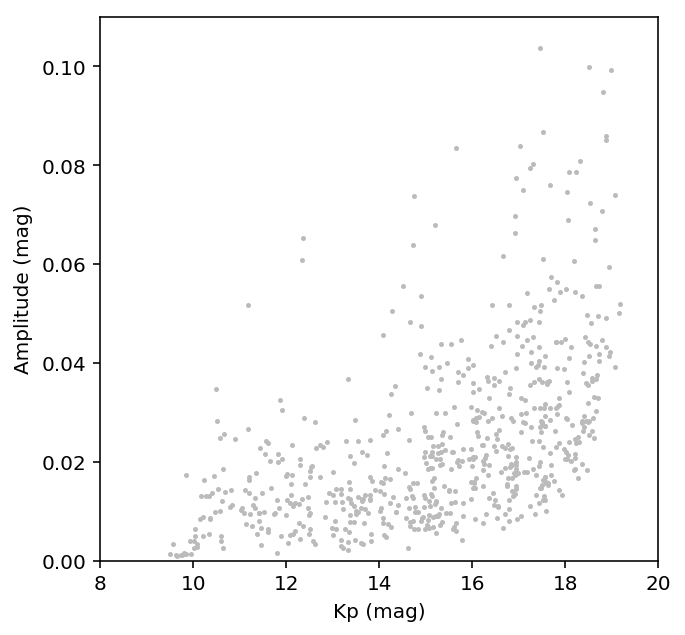

In [19]:
plt.figure(figsize=(5,5))
plt.plot(df3.Kpmag, df3['Raw-Amp'], '.', ms=3, color='#BBBBBB')
plt.xlim(8, 20)
plt.ylim(0, 0.11)
plt.xlabel('Kp (mag)')
plt.ylabel('Amplitude (mag)')

## Spectroscopic selection for iSHELL C16 monitoring

Selection criteria for iSHELL

0. Previously observed by Douglas et al. 2017
1. Being observed in K2 C16
2. Bright enough for iSHELL
3. Large amplitude of starspot modulation
4. Medium-to-low period (lower vsini, on average)


The K2 website has the list of targets in C16

In [20]:
c16_GO_url = 'https://keplerscience.arc.nasa.gov/data/campaigns/c16/K2Campaign16targets.csv'

In [21]:
df_GO_c16 = pd.read_csv(c16_GO_url)

In [22]:
df3.shape, df_GO_c16.shape

((794, 26), (35571, 5))

In [23]:
df_C16 = pd.merge(df3, df_GO_c16, how = 'inner', left_on='EPIC', right_on='EPIC ID')

In [24]:
df_C16.shape

(308, 31)

OK, so 308 targets are being re-observed.  Good.

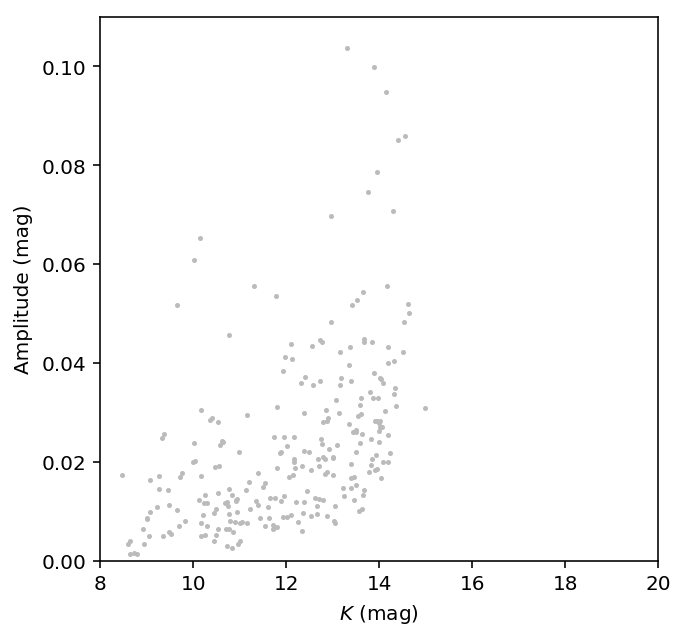

In [25]:
plt.figure(figsize=(5,5))
plt.plot(df_C16.Kmag, df_C16['Raw-Amp'], '.', ms=3, color='#BBBBBB')
plt.xlim(8, 20)
plt.ylim(0, 0.11)
plt.xlabel('$K$ (mag)')
plt.ylabel('Amplitude (mag)')

The iSHELL exposure time calculator indicates a 10.9 magnitude can be achieved in 10 minutes with 6 cycles with a 0.75 arcsecond slit in 0.8 arcsecond seeing.  We don't want to go too bright, because those targets are likely to be more massive stars, which don't show starspots, or are facula dominated.

In [26]:
df_C16['Raw-Amp'].max()

0.27983999999999998

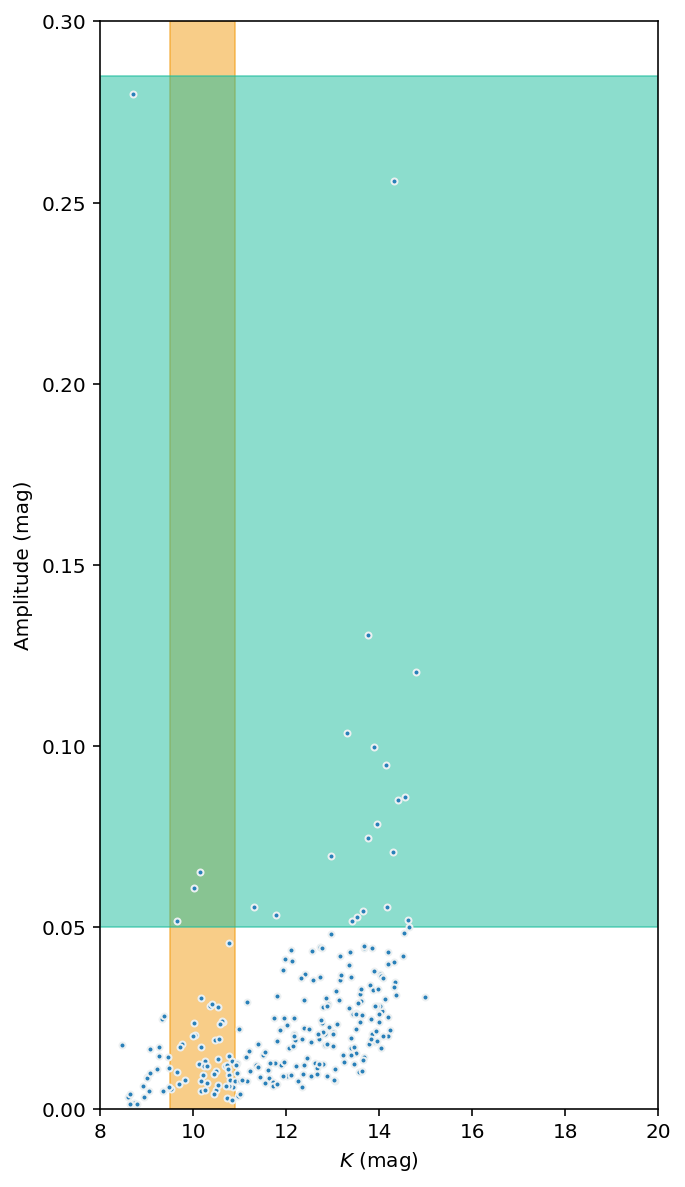

In [27]:
plt.figure(figsize=(5,10))
plt.axvspan(9.5, 10.9, alpha=0.5, color='#f39c12')
plt.axhspan(0.05, 0.285, alpha=0.5, color='#1abc9c')
plt.plot(df_C16.Kmag, df_C16['Raw-Amp'], 'o', ms=3, color='#2980b9', mec='#ecf0f1')
plt.xlim(8, 20)
plt.ylim(0, 0.30)



plt.xlabel('$K$ (mag)')
plt.ylabel('Amplitude (mag)')
plt.savefig('/Users/obsidian/Desktop/beehive/iSHELL_beehive.png', dpi=300)

Well, there are a few objects in the target range.

In [28]:
subset = (df_C16.Kmag > 9.5) & (df_C16.Kmag < 10.9) & (df_C16['Raw-Amp'] > 0.05)
df_C16[subset]

,NAME,EPIC,Mass,r'mag,Kmag,Prot1,Power1,Qual1,Clean?,Threshold,Prot2,Power2,Qual2,Multi-Prot?,Spot-Evol?,Blended?,Binary,Raw-Amp,Smoothed-Amp,Prot-Flag,PTF-Prot,SWASP-Prot,Scholz-Prot,Kovacs-Prot,Kpmag,Notes,EPIC ID,RA (J2000) [deg],Dec (J2000) [deg],magnitude,Investigation IDs
36,KW434,2.11936e+08,1.05,11.13,9.64,4.18,0.6546,0.0,Y,0.00868,NaN,NaN,NaN,N,Y,N,conf,0.05169,2.09998,K,NaN,NaN,NaN,8.27,11.18,amplitude increases significantly over campaign,211935518,130.476516,19.257418,11.181,GO16001_LC|GO16009_LC|GO16021_LC|GO16022_LC|G...
99,KW256,2.1192e+08,1.00,12.30,10.01,4.67,0.4304,0.0,Y,0.00849,NaN,NaN,NaN,M,Y,M,cand,0.06078,2.22994,D,NaN,4.80,NaN,9.76,12.34,NaN,211920022,130.023816,19.025183,12.339,GO16009_LC|GO16020_LC|GO16021_LC|GO16022_LC|G...
160,KW401,2.1191e+08,0.98,12.36,10.15,2.42,0.8636,0.0,Y,0.00818,NaN,NaN,NaN,N,Y,N,conf,0.06528,3.08847,D,NaN,2.43,NaN,9.61,12.36,NaN,211909748,130.37795,18.871872,12.363,GO16009_LC|GO16021_LC|GO16022_LC|GO16031_LC|G...


In [29]:
df_C16.columns

Index(['NAME', 'EPIC', 'Mass', 'r'mag', 'Kmag', 'Prot1', 'Power1', 'Qual1',
       'Clean?', 'Threshold', 'Prot2', 'Power2', 'Qual2', 'Multi-Prot?',
       'Spot-Evol?', 'Blended?', 'Binary', 'Raw-Amp', 'Smoothed-Amp',
       'Prot-Flag', 'PTF-Prot', 'SWASP-Prot', 'Scholz-Prot', 'Kovacs-Prot',
       'Kpmag', 'Notes', 'EPIC ID', ' RA (J2000) [deg]', ' Dec (J2000) [deg]',
       ' magnitude', ' Investigation IDs'],
      dtype='object')

In [31]:
df_C16[subset]

,NAME,EPIC,Mass,r'mag,Kmag,Prot1,Power1,Qual1,Clean?,Threshold,Prot2,Power2,Qual2,Multi-Prot?,Spot-Evol?,Blended?,Binary,Raw-Amp,Smoothed-Amp,Prot-Flag,PTF-Prot,SWASP-Prot,Scholz-Prot,Kovacs-Prot,Kpmag,Notes,EPIC ID,RA (J2000) [deg],Dec (J2000) [deg],magnitude,Investigation IDs
36,KW434,2.11936e+08,1.05,11.13,9.64,4.18,0.6546,0.0,Y,0.00868,NaN,NaN,NaN,N,Y,N,conf,0.05169,2.09998,K,NaN,NaN,NaN,8.27,11.18,amplitude increases significantly over campaign,211935518,130.476516,19.257418,11.181,GO16001_LC|GO16009_LC|GO16021_LC|GO16022_LC|G...
99,KW256,2.1192e+08,1.00,12.30,10.01,4.67,0.4304,0.0,Y,0.00849,NaN,NaN,NaN,M,Y,M,cand,0.06078,2.22994,D,NaN,4.80,NaN,9.76,12.34,NaN,211920022,130.023816,19.025183,12.339,GO16009_LC|GO16020_LC|GO16021_LC|GO16022_LC|G...
160,KW401,2.1191e+08,0.98,12.36,10.15,2.42,0.8636,0.0,Y,0.00818,NaN,NaN,NaN,N,Y,N,conf,0.06528,3.08847,D,NaN,2.43,NaN,9.61,12.36,NaN,211909748,130.37795,18.871872,12.363,GO16009_LC|GO16021_LC|GO16022_LC|GO16031_LC|G...


In [32]:
good_cols = ['NAME', 'EPIC', 'Mass', "r'mag", 'Kmag', 'Prot1',
       'Clean?', 'Multi-Prot?',
       'Spot-Evol?', 'Blended?', 'Binary', 'Raw-Amp', 'Smoothed-Amp',
       'Prot-Flag',
       'Kpmag', 'EPIC ID', ' RA (J2000) [deg]', ' Dec (J2000) [deg]',
       ' magnitude']

In [33]:
df_C16.columns

Index(['NAME', 'EPIC', 'Mass', 'r'mag', 'Kmag', 'Prot1', 'Power1', 'Qual1',
       'Clean?', 'Threshold', 'Prot2', 'Power2', 'Qual2', 'Multi-Prot?',
       'Spot-Evol?', 'Blended?', 'Binary', 'Raw-Amp', 'Smoothed-Amp',
       'Prot-Flag', 'PTF-Prot', 'SWASP-Prot', 'Scholz-Prot', 'Kovacs-Prot',
       'Kpmag', 'Notes', 'EPIC ID', ' RA (J2000) [deg]', ' Dec (J2000) [deg]',
       ' magnitude', ' Investigation IDs'],
      dtype='object')

In [34]:
df_C16[subset][good_cols].T

,36,99,160
NAME,KW434,KW256,KW401
EPIC,2.11936e+08,2.1192e+08,2.1191e+08
Mass,1.05,1,0.98
r'mag,11.13,12.3,12.36
Kmag,9.64,10.01,10.15
Prot1,4.18,4.67,2.42
Clean?,Y,Y,Y
Multi-Prot?,N,M,N
Spot-Evol?,Y,Y,Y
Blended?,N,M,N


In [35]:
pd.merge(df_C16[subset][good_cols], tab2.to_pandas(), on='EPIC').T

,0,1,2
NAME_x,KW434,KW256,KW401
EPIC,2.11936e+08,2.1192e+08,2.1191e+08
Mass,1.05,1,0.98
r'mag,11.13,12.3,12.36
Kmag,9.64,10.01,10.15
Prot1,4.18,4.67,2.42
Clean?,Y,Y,Y
Multi-Prot?,N,M,N
Spot-Evol?,Y,Y,Y
Blended?,N,M,N
